# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

<function matplotlib.pyplot.show(close=None, block=None)>

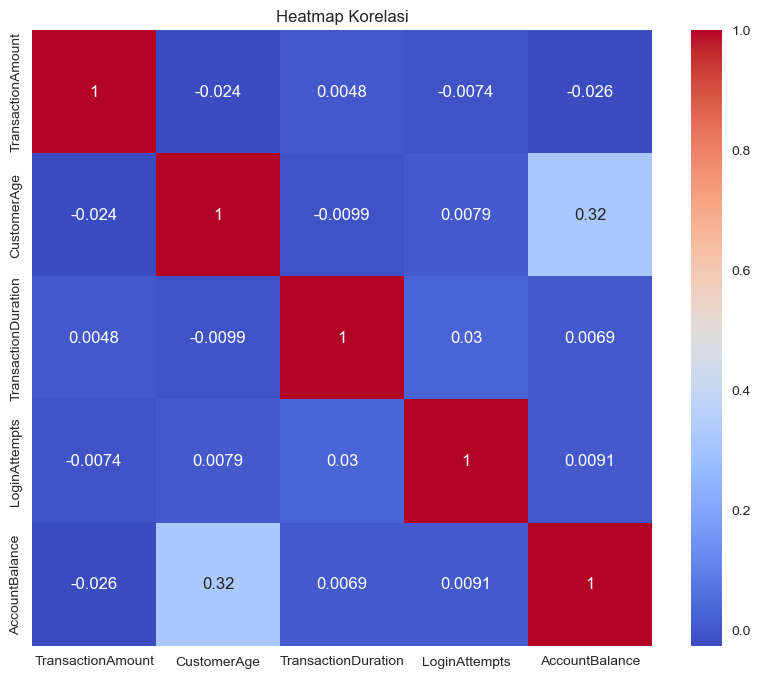

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10,8))
data_numerik = df.select_dtypes(include=['number'])
sns.heatmap(data_numerik.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show

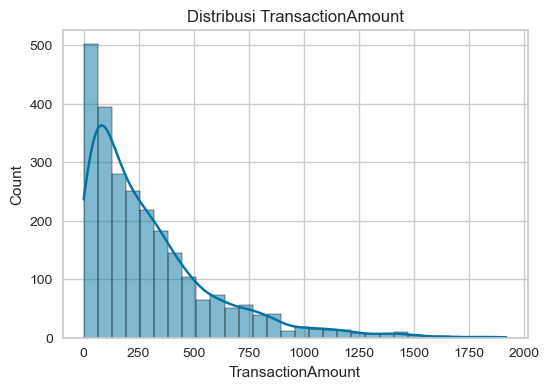

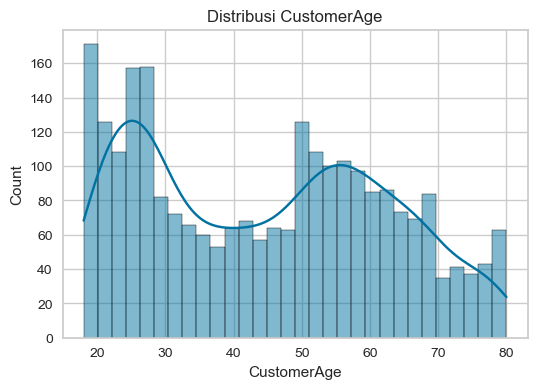

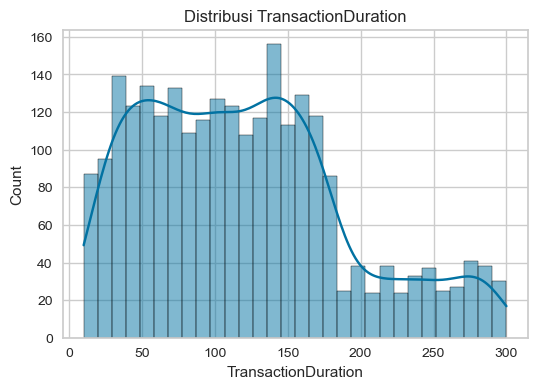

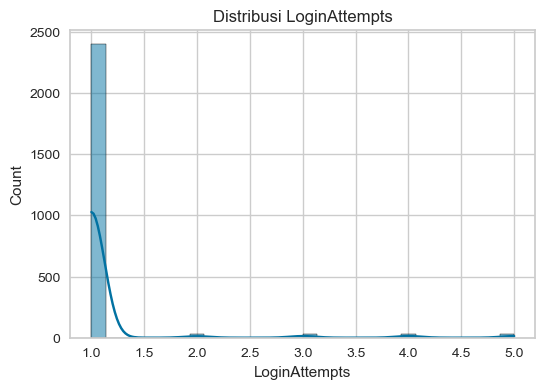

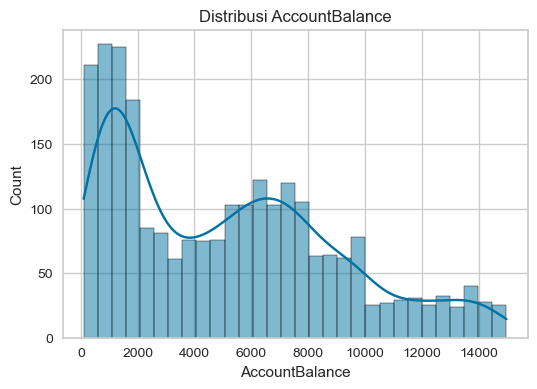

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
kolom_numerik = df.select_dtypes(include=['float64','int64']).columns
for kolom in kolom_numerik:
    plt.figure(figsize=(6,4))
    sns.histplot(df[kolom], kde=True, bins=30)
    plt.title(f'Distribusi {kolom}')
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

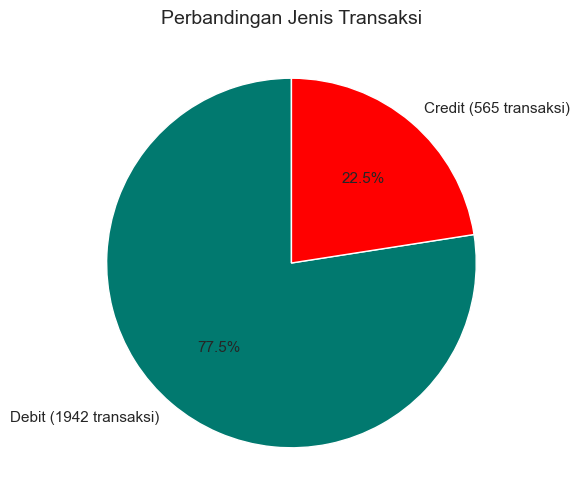

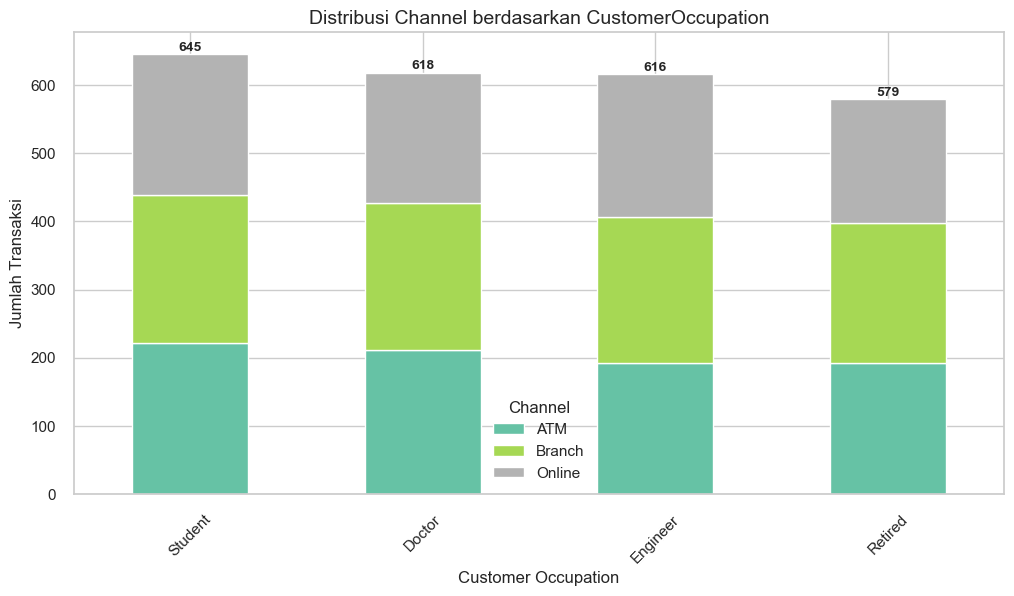

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
sns.set(style="whitegrid")

# Hitung jumlah transaksi per tipe
type_counts = df['TransactionType'].value_counts()

colors = ["#01796f", "red"]

# Buat label dengan jumlah + persentase
labels = [f"{t} ({c} transaksi)" for t, c in zip(type_counts.index, type_counts.values)]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    type_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(type_counts)],
    textprops={'fontsize': 11}
)
plt.title("Perbandingan Jenis Transaksi", fontsize=14)
plt.show()


# Buat pivot table: Occupation x Channel
pivot_data = df.pivot_table(
    index="CustomerOccupation",
    columns="Channel",
    values="TransactionID",
    aggfunc="count",
    fill_value=0
)

# Hitung total transaksi per occupation untuk sorting
pivot_data["Total"] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values("Total", ascending=False)

# Simpan total lalu drop kolom Total agar tidak ikut di plot
totals = pivot_data["Total"].copy()
pivot_data = pivot_data.drop(columns="Total")

# Plot stacked bar
ax = pivot_data.plot(
    kind="bar",
    stacked=True,
    figsize=(12,6),
    colormap="Set2"
)

plt.title("Distribusi Channel berdasarkan CustomerOccupation", fontsize=14)
plt.xlabel("Customer Occupation")
plt.ylabel("Jumlah Transaksi")
plt.xticks(rotation=45)

# Tambahkan total transaksi di atas bar
for i, total in enumerate(totals):
    ax.text(i, total + 5, str(total), ha="center", fontsize=10, fontweight="bold")

plt.legend(title="Channel")
plt.show()




# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print('Data yang hilang:')
print(df.isnull().sum())

Data yang hilang:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print('Data yang duplikat: ')
print(df.duplicated().sum())

Data yang duplikat: 
21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
scaler = StandardScaler()
df[kolom_numerik] = scaler.fit_transform(df[kolom_numerik])
print('Dataset setelah preprocessing:')
print(df.head())

Dataset setelah preprocessing:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862          

In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
hapus_kolom = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df = df.drop(columns=hapus_kolom)

In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
kolom_kategorikal = df.select_dtypes(include=['object']).columns
label_encoders = {}

for kolom in kolom_kategorikal:
    le = LabelEncoder()
    df[kolom] = le.fit_transform(df[kolom])
    label_encoders[kolom] = le  # Simpan encoder ke dalam dictionary

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,NaN,3,1.121495,-0.204629,0.594263,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()



['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df.fillna(df.median(numeric_only=True), inplace=True)
for kolom in df.select_dtypes(include=['object', 'category']).columns:
    df[kolom].fillna(df[kolom].mode()[0], inplace=True)


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
df.head()

Jumlah baris setelah menghapus duplikat: 2537


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.970546,680,1,36,0,1.419862,0,-0.548393,-0.204629,-0.000315,105
1,0.268963,1178,1,15,0,1.307715,0,0.307960,-0.204629,2.218381,192
2,-0.586526,1262,1,23,2,-1.439874,3,-0.905207,-0.204629,-1.024091,41
3,-0.387294,818,1,33,2,-1.047361,3,-1.347656,-0.204629,0.886694,163
4,-0.972736,1939,0,1,2,0.018031,3,1.121495,-0.204629,0.594263,16


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
df_outlier_handled = df.copy()

# Deteksi dan tangani outlier pada setiap kolom numerik
for kolom in df_outlier_handled.select_dtypes(include=[np.number]).columns:
    Q1 = df_outlier_handled[kolom].quantile(0.25)
    Q3 = df_outlier_handled[kolom].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR

    # Hitung jumlah outlier
    outliers = df_outlier_handled[(df_outlier_handled[kolom] < batas_bawah) | (df_outlier_handled[kolom] > batas_atas)]
    print(f"Kolom: {kolom}, Jumlah outlier: {outliers.shape[0]}")

    # Handling: pilih drop atau imputasi
    if outliers.shape[0] < 50:
        # Drop outlier jika jumlahnya sedikit
        df_outlier_handled = df_outlier_handled[~((df_outlier_handled[kolom] < batas_bawah) | (df_outlier_handled[kolom] > batas_atas))]
    else:
        # Ganti outlier dengan median jika jumlahnya banyak
        median = df_outlier_handled[kolom].median()
        df_outlier_handled.loc[df_outlier_handled[kolom] < batas_bawah, kolom] = median
        df_outlier_handled.loc[df_outlier_handled[kolom] > batas_atas, kolom] = median


Kolom: TransactionAmount, Jumlah outlier: 114
Kolom: TransactionDate, Jumlah outlier: 0
Kolom: TransactionType, Jumlah outlier: 595
Kolom: Location, Jumlah outlier: 0
Kolom: Channel, Jumlah outlier: 0
Kolom: CustomerAge, Jumlah outlier: 0
Kolom: CustomerOccupation, Jumlah outlier: 0
Kolom: TransactionDuration, Jumlah outlier: 0
Kolom: LoginAttempts, Jumlah outlier: 120
Kolom: AccountBalance, Jumlah outlier: 0
Kolom: PreviousTransactionDate, Jumlah outlier: 0


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.
# Salin dataframe
df_binning = df.copy()

# Binning CustomerAge
bins_age = [0, 25, 45, 100]
labels_age = ['Muda', 'Dewasa', 'Senior']
df_binning['AgeGroup'] = pd.cut(df_binning['CustomerAge'], bins=bins_age, labels=labels_age)

# Binning TransactionAmount secara dinamis agar tidak error
max_amount = df_binning['TransactionAmount'].max()
# Pastikan max_amount lebih besar dari 1000
if max_amount <= 1000:
    max_amount = 1000 + 1  # supaya urutan bins tetap valid

bins_amount = [0, 100, 1000, max_amount]
labels_amount = ['Kecil', 'Sedang', 'Besar']
df_binning['AmountGroup'] = pd.cut(df_binning['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Encoding hasil binning
le_age = LabelEncoder()
le_amount = LabelEncoder()
df_binning['AgeGroupEncoded'] = le_age.fit_transform(df_binning['AgeGroup'])
df_binning['AmountGroupEncoded'] = le_amount.fit_transform(df_binning['AmountGroup'])

# Tampilkan hasil akhir
df_binning[['CustomerAge', 'AgeGroup', 'AgeGroupEncoded', 'TransactionAmount', 'AmountGroup', 'AmountGroupEncoded']].head()

,CustomerAge,AgeGroup,AgeGroupEncoded,TransactionAmount,AmountGroup,AmountGroupEncoded
0,1.419862,Muda,0,-0.970546,NaN,1
1,1.307715,Muda,0,0.268963,Kecil,0
2,-1.439874,NaN,1,-0.586526,NaN,1
3,-1.047361,NaN,1,-0.387294,NaN,1
4,0.018031,Muda,0,-0.972736,NaN,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df_binning.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroupEncoded,AmountGroupEncoded
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,-0.003027,1255.665353,0.789121,21.319275,1.009460,0.000128,1.530942,-0.001086,-0.001694,-0.001036,180.991328,0.489555,0.625936
std,0.995503,725.645819,0.436044,12.394402,0.830646,0.996644,1.149307,0.995116,0.996222,0.994911,103.966932,0.499989,0.483976
min,-1.017881,0.000000,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100,0.000000,0.000000,0.000000
25%,-0.734452,629.000000,1.000000,11.000000,0.000000,-0.991288,1.000000,-0.805299,-0.204629,-0.922223,92.000000,0.000000,0.000000
50%,-0.295362,1255.000000,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-0.204629,-0.097334,181.000000,0.000000,1.000000
75%,0.383177,1884.000000,1.000000,32.000000,2.000000,0.803056,3.000000,0.593411,-0.204629,0.644976,272.000000,1.000000,1.000000
max,5.549651,2485.000000,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,6.525404,2.531190,360.000000,1.000000,1.000000


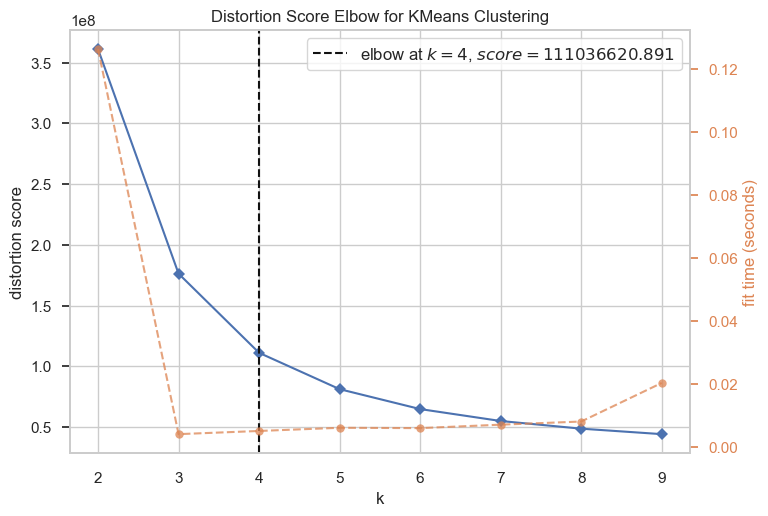

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
X = df_binning.select_dtypes(include='number')

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Visualisasi Elbow Method
visualizer = KElbowVisualizer(model, k=(2,10))  # Uji jumlah cluster dari 2 hingga 10
visualizer.fit(X)                               # Melatih model
visualizer.show()                               # Menampilkan grafik

In [21]:
# Menggunakan algoritma K-Means Clustering
model_kmeans = KMeans(n_clusters=3, random_state=42)
model_kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
X = df_binning.select_dtypes(include='number')

# Melatih model KMeans dengan jumlah cluster optimal (misal: 3)
model_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = model_kmeans.fit_predict(X)

# Tambahkan hasil cluster ke dataframe
df_binning['Cluster'] = clusters

# Hitung silhouette score
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.5402


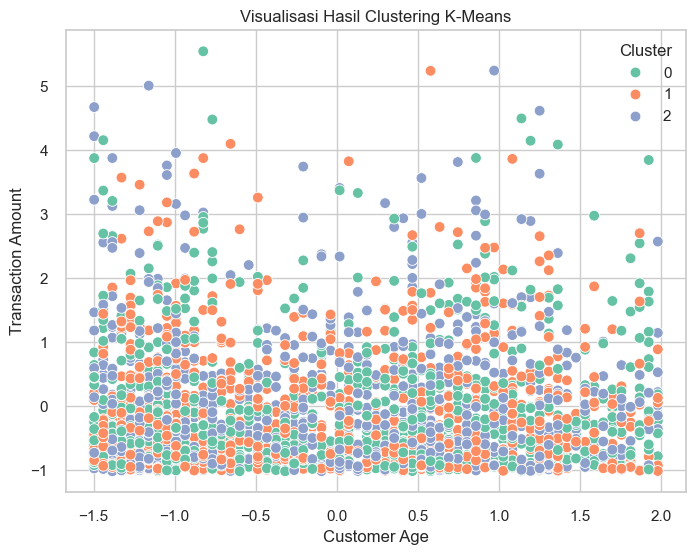

In [24]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_binning, x='CustomerAge', y='TransactionAmount', hue='Cluster', palette='Set2', s=60)
plt.title('Visualisasi Hasil Clustering K-Means')
plt.xlabel('Customer Age')
plt.ylabel('Transaction Amount')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
X = df_binning.select_dtypes(include='number')

pca=PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
PCA_2 = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
model_kmeans_pca = KMeans(n_clusters=3 )
model_kmeans_pca.fit(PCA_2)

KMeans(n_clusters=3)

In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
fitur_numerik = df_binning.select_dtypes(include='number').columns

cluster_summary = df_binning.groupby('Cluster')[fitur_numerik].agg(['mean', 'min', 'max', 'median', 'std'])

cluster_summary

TransactionAmount                                          \
                     mean       min       max    median       std   
Cluster                                                             
0                0.020414 -1.017676  5.549651 -0.295362  1.003319   
1               -0.045048 -1.015827  5.244659 -0.305424  0.943387   
2                0.016009 -1.017881  5.248151 -0.294198  1.038047   

        TransactionDate                                  ...  \
                   mean   min   max  median         std  ...   
Cluster                                                  ...   
0           1261.591017   843  1680  1261.5  242.499686  ...   
1            421.341549     0   842   421.5  243.962066  ...   
2           2096.941597  1681  2485  2097.0  239.624787  ...   

        AmountGroupEncoded                          Cluster                 \
                      mean min max median       std    mean min max median   
Cluster                                                                      
0                 0.632388   0   1    1.0  0.482440     0.0   0   0    0.0   
1                 0.631455   0   1    1.0  0.482693     1.0   1   1    1.0   
2                 0.613826   0   1    1.0  0.487162     2.0   2   2    2.0   

              
         std  
Cluster       
0        0.0  
1        0.0  
2        0.0  

[3 rows x 70 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (0)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse>
  - TransactionAmount: 0.0204
  - TransactionDate: 1261.59
  - CustomerAge: ≈ 0 (skala sudah distandardisasi)
  - AmountGroupEncoded: 0.63 (lebih sering kategori Sedang/Besar)
  <Setelah inverse>- **Analisis:**
  Cluster ini mewakili customer dengan transaksi nominal rata-rata normal (tidak terlalu kecil/tinggi).
Usia customer cenderung beragam (sedang).
Transaksi lebih dominan pada periode pertengahan dataset (sekitar pertengahan tahun).
Karakteristiknya bisa dibilang customer stabil dengan pola transaksi seimbang.

2. Cluster 2 (1):

Rata-rata (mean):
- TransactionAmount: -0.0450 (sedikit lebih rendah)
- TransactionDate: 421.34
- CustomerAge: relatif lebih muda (nilai z-score lebih rendah)
- AmountGroupEncoded: 0.63 (mayoritas Kecil/Sedang)

Analisis:
Cluster ini mewakili customer muda dengan transaksi kecil hingga sedang, dan periode transaksi lebih condong ke awal dataset (tanggal lebih kecil).
Bisa diinterpretasi sebagai early adopters atau pengguna baru yang lebih sering melakukan transaksi kecil.

3. Cluster 3 (2):

Rata-rata (mean):
- TransactionAmount: 0.0160 (cukup mirip cluster 0)
- TransactionDate: 2096.94 (periode transaksi paling akhir / terbaru)
- CustomerAge: cenderung lebih tinggi (z-score positif → lebih tua)
 - AmountGroupEncoded: 0.61 (lebih condong ke Sedang/Besar)

Analisis:
Cluster ini mewakili customer yang lebih senior dengan transaksi pada periode terbaru dataset.
Nominal transaksi cenderung sedang hingga besar.
Bisa dianggap customer aktif belakangan waktu terakhir dengan daya beli lebih tinggi.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
cluster_summary = cluster_summary.rename(columns={'Cluster': 'Target'})
print(cluster_summary.columns)

MultiIndex([(      'TransactionAmount',   'mean'),
            (      'TransactionAmount',    'min'),
            (      'TransactionAmount',    'max'),
            (      'TransactionAmount', 'median'),
            (      'TransactionAmount',    'std'),
            (        'TransactionDate',   'mean'),
            (        'TransactionDate',    'min'),
            (        'TransactionDate',    'max'),
            (        'TransactionDate', 'median'),
            (        'TransactionDate',    'std'),
            (        'TransactionType',   'mean'),
            (        'TransactionType',    'min'),
            (        'TransactionType',    'max'),
            (        'TransactionType', 'median'),
            (        'TransactionType',    'std'),
            (               'Location',   'mean'),
            (               'Location',    'min'),
            (               'Location',    'max'),
            (               'Location', 'median'),
            (               'Lo

In [29]:
# Simpan Data
cluster_summary.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
df[kolom_numerik] = scaler.inverse_transform(df_binning[kolom_numerik])
df_inverse=df[kolom_numerik]
# tampilkan dataset yang sudah di-inverse
df_inverse.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.0,81.0,1.0,5112.21
1,376.24,68.0,141.0,1.0,13758.91
2,126.29,19.0,56.0,1.0,1122.35
3,184.50,26.0,25.0,1.0,8569.06
4,13.45,45.0,198.0,1.0,7429.40


In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
for col in kolom_kategorikal:
    encoder = label_encoders[col]
    df_inverse[col] = encoder.inverse_transform(df_binning[col].astype(int))
# tampilkan dataset yang sudah di-inverse
df_inverse.head()
print(df_inverse.columns)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionDate', 'TransactionType',
       'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')


C:\Users\Alwan\AppData\Local\Temp\ipykernel_23296\1335657925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverse[col] = encoder.inverse_transform(df_binning[col].astype(int))
C:\Users\Alwan\AppData\Local\Temp\ipykernel_23296\1335657925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inverse[col] = encoder.inverse_transform(df_binning[col].astype(int))
C:\Users\Alwan\AppData\Local\Temp\ipykernel_23296\1335657925.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.
# Pisahkan kolom numerik & kategorikal
num_cols = df_inverse.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df_inverse.select_dtypes(include=['object']).columns

# Analisis deskriptif numerik
desc_num = df_inverse[num_cols].agg(['mean', 'min', 'max']).T

# Analisis deskriptif kategorikal (pakai mode)
desc_cat = df_inverse[cat_cols].mode().iloc[0]

# Gabungkan hasil
print("===== Analisis Numerik =====")
print(desc_num)

print("\n===== Analisis Kategorikal (Mode) =====")
print(desc_cat)

# --- Jika ingin groupby berdasarkan Target (hasil clustering) ---
# Pastikan df_inverse punya kolom Target
if "Target" in df_binning.columns:
    df_inverse["Target"] = df_binning["Target"]

    # Numerik per cluster
    group_num = df_inverse.groupby("Target")[num_cols].agg(['mean', 'min', 'max'])

    # Kategorikal per cluster (ambil mode tiap grup)
    group_cat = df_inverse.groupby("Target")[cat_cols].agg(lambda x: x.mode()[0])

    print("\n===== Deskriptif Numerik per Cluster =====")
    print(group_num)

    print("\n===== Deskriptif Kategorikal per Cluster =====")
    print(group_cat)

===== Analisis Numerik =====
                            mean     min       max
TransactionAmount     296.772073    0.26   1919.11
CustomerAge            44.680725   18.00     80.00
TransactionDuration   119.346866   10.00    300.00
LoginAttempts           1.120615    1.00      5.00
AccountBalance       5109.401127  101.25  14977.99

===== Analisis Kategorikal (Mode) =====
TransactionDate            2023-01-02 16:45:05
TransactionType                          Debit
Location                            Fort Worth
Channel                                 Branch
CustomerOccupation                     Student
PreviousTransactionDate    2024-11-04 08:09:17
Name: 0, dtype: object


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (0)**:
  - **Rata-rata (mean) <Fitur>:
  - TransactionAmount: rata-rata sedang (contoh: Rp 100–300 ribu), min mendekati transaksi kecil, max bisa besar.
- CustomerAge: rata-rata usia menengah (sekitar 30–40an).
- AccountBalance: saldo akun stabil di tingkat menengah.
- TransactionDuration: durasi transaksi normal (tidak terlalu cepat/lama).
- LoginAttempts: cenderung 1 kali login (aman).
- Channel (mode): Online.
- CustomerOccupation (mode): Student.** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini merepresentasikan nasabah muda/menengah dengan aktivitas transaksi normal, lebih sering menggunakan channel online, saldo relatif stabil, serta transaksi nominal sedang. Bisa dikategorikan sebagai pengguna reguler digital banking.

2. Cluster 2 (1)
- Rentang & Rata-rata (mean):
- TransactionAmount: cenderung kecil → transaksi harian / kebutuhan sederhana.
- CustomerAge: rata-rata lebih muda (20an).
- AccountBalance: saldo relatif rendah.
- TransactionDuration: relatif singkat.
- LoginAttempts: biasanya 1, jarang gagal login.
- Channel (mode): ATM.
- CustomerOccupation (mode): Student / entry level.

Analisis:
Cluster ini adalah nasabah muda dengan transaksi kecil, saldo terbatas, sering memakai ATM, kemungkinan mahasiswa atau pekerja awal karir. Mereka lebih banyak melakukan transaksi sederhana dibanding nominal besar.
  
3. Cluster 3 (Target = 2)
- Rentang & Rata-rata (mean):
- TransactionAmount: rata-rata sedang–besar.
- CustomerAge: lebih senior (40–60an).
- AccountBalance: relatif tinggi (saldo besar).
- TransactionDuration: lebih bervariasi.
- LoginAttempts: 1 (aman).
- Channel (mode): Branch / Online.
- CustomerOccupation (mode): Doctor / Professional.

Analisis:
Cluster ini merepresentasikan nasabah lebih senior dengan saldo tinggi dan transaksi bernilai lebih besar, cenderung menggunakan branch atau layanan premium. Mereka adalah customer prioritas / high-value.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
print(df_inverse.columns)

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionDate', 'TransactionType',
       'Location', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate'],
      dtype='object')


In [34]:
# Simpan Data
if "Target" not in df_inverse.columns:
    # Copy cluster dari df_binning
    df_inverse["Target"] = df_binning["Cluster"]

# Simpan dataset final dengan kolom Target
df_final = df_inverse.copy()
df_final.to_csv("data_clustering_inverse.csv", index=False)

print("Dataset final siap dipakai untuk klasifikasi!")
print(df_final.head())
print("Kolom dataset:", df_final.columns)

Dataset final siap dipakai untuk klasifikasi!
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
4              13.45         45.0                198.0            1.0   

   AccountBalance      TransactionDate TransactionType   Location Channel  \
0         5112.21  2023-04-11 16:29:14           Debit  San Diego     ATM   
1        13758.91  2023-06-27 16:44:19           Debit    Houston     ATM   
2         1122.35  2023-07-10 18:16:08           Debit       Mesa  Online   
3         8569.06  2023-05-05 16:32:11           Debit    Raleigh  Online   
4         7429.40  2023-10-16 17:51:24          Credit    Atlanta  Online   

  CustomerOccupation PreviousTransactionDate  Target

End of Code.